# Bike Sharing System 2011

![imagen_logo](CapitalBikeshare_Logo.jpg)


*****

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (1 a 7).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica.
    - Describe la situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes:

      - Indica condiciones meteorológicas en las que el cielo está despejado o parcialmente nublado, con pocas nubes visibles.

    2. Niebla + Pocas nubes, Niebla:

      - Hace referencia a condiciones de niebla o bruma en combinación con nubes o cielo nublado.

    3. Lluvia ligera, Tormenta + Nubes dispersas:

      - Representa condiciones de lluvia ligera junto con la presencia de tormentas o nubes dispersas en el cielo.

    4. Lluvia intensa + Granizo + Tormenta:

      - Indica condiciones meteorológicas adversas, como lluvia intensa, granizo, tormenta, niebla o nevada con visibilidad reducida debido a la niebla.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Variables

In [1]:
alpha = 0.05

## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Carga de Datos

In [4]:
df = pd.read_csv('./bike+sharing+dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.shape

(17379, 17)

Como solo voy a trabajar con un año para mi hipótesis. Elegí el 2011.

In [6]:
df2011= df.query('yr == 0')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df2011.shape

(8645, 17)

In [8]:
df2011.to_csv('Dataset_2011.csv', index=False) 

In [9]:
df2012 = df.query('yr == 1')
df2012.to_csv('Dataset_2012.csv', index=False)

## Primera exploración

In [33]:
df2011 = pd.read_csv('Dataset_2011.csv',sep=',')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df2011.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [15]:
df2011.shape

(8645, 17)

In [16]:
df2011.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  casual      8645 non-null   int64  
 15  registered  8645 non-null   int64  
 16  cnt         8645 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.1+ MB


In [18]:
df2011.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8645.000000,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,2495.740872,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,4323.000000,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,6484.000000,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,8645.000000,4.000000,0.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


## Limpieza

In [34]:
df2011.set_index('instant',inplace=True)
df2011.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
df2011.drop(columns=['yr'],inplace=True) 
df2011.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- La instancia la tomaré como índice.
- Eliminamos la variable **'yr'** ya que representaba el 2011 en valores = 0.

In [37]:
df2011.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2.513592,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,1.105477,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


- Season: Podemos ver que la temporada de verano abarca la media y el 75%.
- temp, atemp, hum: Los valores normalizados no son tan visibles al momento de tratar o mismo gráficar aquellos datos.
- casual, registered, cnt : Los valores máximos se encuentran bastante alejados.


*****

- **temp**: Temperatura normalizada en Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

- **atemp**: Sensación térmica normalizada en Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

- **hum**: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

- **windspeed**: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

*Aplicamos la fórmula ajustada:*

Temperatura Discreta = valor_ajustado_temp = **0.24** **×** multiplicamos por su ajuste = **41**

*Calculamos el resultado:*

Temperatura Discreta = round(9.84)

Temperatura Discreta =10

In [39]:
df2011 = df2011.assign(
    temperatura = (lambda x : round(x.temp * 41)),
    sensacionTermica = (lambda x : round(x.atemp * 50)),
    humedad = (lambda x : round(x.hum * 100)),
    velViento = (lambda x: round(x.windspeed * 67))
)

In [40]:
df2011.drop(columns= ['temp','atemp','hum', 'windspeed'], inplace=True)
df2011.describe(include='all')

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.513592,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,28.600578,115.193869,143.794448,20.035049,23.453788,64.342973,12.808213
std,NaN,1.105477,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,38.840789,109.461014,133.797854,8.126433,8.851484,19.629328,8.253896
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,26.000000,31.000000,13.000000,16.000000,49.000000,7.000000
50%,NaN,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,14.000000,90.000000,109.000000,20.000000,24.000000,65.000000,13.000000
75%,NaN,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,38.000000,168.000000,211.000000,27.000000,31.000000,81.000000,19.000000


*****

- Ahora analizaremos los tipos de datos, si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipótesis.

In [42]:
df2011['dteday'] = pd.to_datetime(df2011['dteday'])
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dteday            8645 non-null   datetime64[ns]
 1   season            8645 non-null   int64         
 2   mnth              8645 non-null   int64         
 3   hr                8645 non-null   int64         
 4   holiday           8645 non-null   int64         
 5   weekday           8645 non-null   int64         
 6   workingday        8645 non-null   int64         
 7   weathersit        8645 non-null   int64         
 8   casual            8645 non-null   int64         
 9   registered        8645 non-null   int64         
 10  cnt               8645 non-null   int64         
 11  temperatura       8645 non-null   float64       
 12  sensacionTermica  8645 non-null   float64       
 13  humedad           8645 non-null   float64       
 14  velViento         8645 non-nu

El dataframe se encuentra armado en base a horas, es decir, por día tendremos 24 registros.

- *Nos damos cuenta que faltan datos: **365 * 24 = 8760***

In [43]:
df2011.shape

(8645, 15)

In [44]:
df2011['dteday'].nunique()

365

In [46]:
df_hour = df2011.groupby(['dteday','mnth'])[['hr']].count()
df_hour

,,hr
dteday,mnth,
2011-01-01,1,24
2011-01-02,1,23
2011-01-03,1,22
2011-01-04,1,23
2011-01-05,1,23
...,...,...
2011-12-27,12,24
2011-12-28,12,23
2011-12-29,12,24


In [47]:
df_hour.query('hr <= 23').sort_values(by='mnth') 

,,hr
dteday,mnth,
2011-01-02,1,23
2011-01-30,1,23
2011-01-29,1,23
2011-01-28,1,23
2011-01-27,1,8
2011-01-26,1,16
2011-01-25,1,23
2011-01-23,1,23
2011-01-22,1,23


- Como no hubo utilidad de las bicicletas durante dichas horas, no figura en la Base de Datos. Ahora la pregunta es, vale rellenar con valores aquellas filas restantes que son apróximadamente el 1,43% del total.

In [52]:
df2011.isnull().sum()

dteday              0
season              0
mnth                0
hr                  0
holiday             0
weekday             0
workingday          0
weathersit          0
casual              0
registered          0
cnt                 0
temperatura         0
sensacionTermica    0
humedad             0
velViento           0
dtype: int64

In [54]:
df2011[(df2011['dteday'].isna()) | (df2011['season'].isna()) | (df2011['mnth'].isna()) | (df2011['hr'].isna()) | (df2011['holiday'].isna()) |
       (df2011['weekday'].isna()) | (df2011['workingday'].isna()) | (df2011['weathersit'].isna()) | (df2011['casual'].isna()) |
       (df2011['registered'].isna()) | (df2011['cnt'].isna()) | (df2011['temperatura'].isna()) | (df2011['sensacionTermica'].isna()) |
       (df2011['humedad'].isna()) | (df2011['velViento'].isna())]

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,


In [49]:
df2011.duplicated(keep=False).sum()

0

In [50]:
df2011.to_csv('Dataset_clear_2011.csv')

## Análisis 

### Análisis univariante

> #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto en la cantidad de viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas y una disminución en las estaciones más frías.**
 

Utilización Estacional:
- ¿Cómo varía la frecuencia de uso de las bicicletas a lo largo de las estaciones del año?
- ¿Hay alguna estación en la que se observa un aumento o disminución significativa en el uso de bicicletas?

Diferencias entre Estaciones:
- ¿Existen patrones de uso de bicicletas distintos entre estaciones para clientes casuales y registrados?

Preferencias Estacionales:
- ¿Hay estaciones específicas del año en las que los clientes casuales tienden a usar más bicicletas que los registrados, o viceversa?

Patrones Diarios:
- ¿Cómo se distribuye el uso de bicicletas a lo largo del día en diferentes estaciones del año?
- ¿Existen horas pico o valle que difieran entre estaciones?

Impacto del Clima:
- ¿El clima en cada estación del año afecta la utilización de bicicletas de manera significativa?
- ¿Puedes identificar alguna tendencia en la relación entre las condiciones climáticas y la elección de bicicletas por parte de los clientes?

**Podemos confirmar que faltan datos, ya que en esas horas no hubo ningún registro. Por ende, no figura en el DataFrame**

****

>

****

- ¿Cómo varía la frecuencia de uso de las bicicletas a lo largo de las estaciones del año?
- ¿Hay alguna estación en la que se observa un aumento o disminución significativa en el uso de bicicletas?

In [24]:
df2011.query('mnth == 12 and season == 4')

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
7905,2011-12-01,4,12,0,0,4,1,1,1,19,20,11.0,13.0,52.0,22.0
7906,2011-12-01,4,12,1,0,4,1,1,1,9,10,11.0,12.0,60.0,19.0
7907,2011-12-01,4,12,2,0,4,1,1,1,8,9,11.0,11.0,56.0,20.0
7908,2011-12-01,4,12,3,0,4,1,1,1,6,7,11.0,12.0,56.0,17.0
7909,2011-12-01,4,12,4,0,4,1,1,0,1,1,11.0,12.0,56.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8380,2011-12-20,4,12,19,0,2,1,1,6,218,224,16.0,20.0,66.0,0.0
8381,2011-12-20,4,12,20,0,2,1,1,3,144,147,15.0,19.0,66.0,0.0
8382,2011-12-20,4,12,21,0,2,1,1,4,139,143,15.0,18.0,66.0,6.0


In [25]:
# df2011.query('mnth == 12 and dteday == "2011-12-25"')

df2011.query('mnth == 12 and season == 1')

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
8385,2011-12-21,1,12,0,0,3,1,2,7,18,25,14.0,17.0,71.0,9.0
8386,2011-12-21,1,12,1,0,3,1,2,1,10,11,15.0,18.0,66.0,7.0
8387,2011-12-21,1,12,2,0,3,1,2,0,4,4,15.0,19.0,71.0,0.0
8388,2011-12-21,1,12,3,0,3,1,2,0,2,2,15.0,19.0,71.0,0.0
8389,2011-12-21,1,12,4,0,3,1,2,0,2,2,15.0,19.0,71.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,19,0,6,0,1,19,73,92,17.0,21.0,54.0,15.0
8642,2011-12-31,1,12,20,0,6,0,1,8,63,71,17.0,21.0,54.0,15.0
8643,2011-12-31,1,12,21,0,6,0,1,2,50,52,16.0,20.0,58.0,13.0


In [26]:
#Hacer otro dataframe y luego unirlo ene se orden.

# df_pregunta1.sort_values(by=['mnth'],inplace=True)
# df_pregunta1.tail(2).sort_values(by='season',ascending=False, inplace= True)

In [34]:
df_pregunta1 = df2011.groupby(['season','mnth'],sort=False)[['cnt']].sum().reset_index().set_index('season').rename({1:'Invierno',2:'Primavera',3:'Verano',4:'Otoño'},axis='index')
df_pregunta1

,mnth,cnt
season,,
Invierno,1,38189
Invierno,2,48215
Invierno,3,41206
Primavera,3,22839
Primavera,4,94870
Primavera,5,135821
Primavera,6,93786
Verano,6,49726
Verano,7,141341


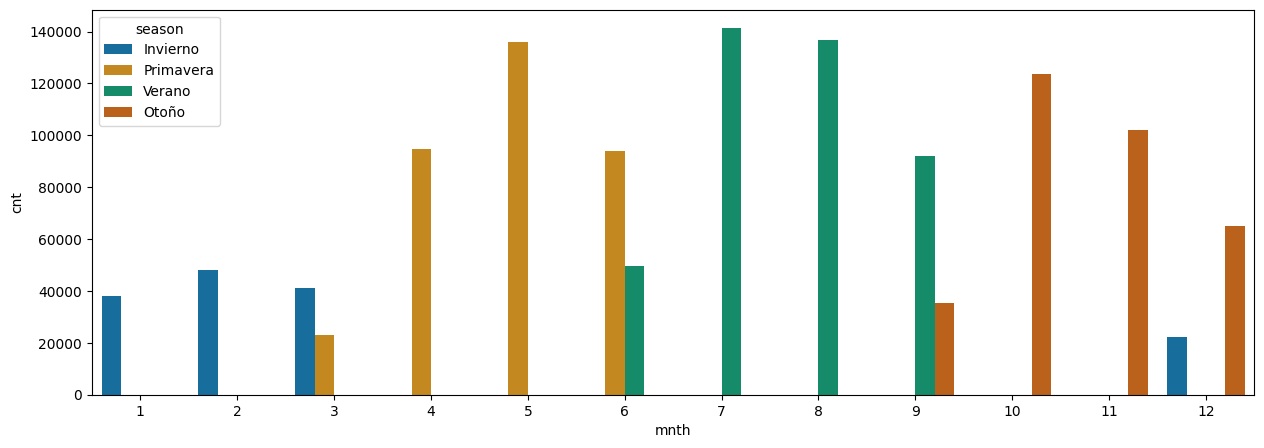

In [37]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data= df_pregunta1, x='mnth',y='cnt',hue='season', palette='colorblind',dodge=True)
sns.move_legend(ax, "upper left");

In [41]:

#Tengo que hacer un pivot table donde casual y regsistered compartan un mismo name que iria en el hue y el otro indice corresponde a mes
test2 = df2011.groupby(['mnth']).aggregate({'casual':'sum', 'registered': 'sum'}).reset_index()
test2.set_index('mnth',append=['registered'])

,,casual,registered
,mnth,,
0,1,3073,35116
1,2,6242,41973
2,3,12826,51219
3,4,22346,72524
4,5,31050,104771
5,6,30612,112900
6,7,36452,104889
7,8,28842,107849
8,9,26545,100873


In [45]:
sns.catplot(x='mnth', hue='', kind='count',edgecolor='0.6',
            data=test2)

ValueError: Cannot pass values for both `x` and `y`.

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(test2['casual'],color='skyblue', label='Casual',dodge=False)
sns.barplot(test2['registered'], color='salmon', label='Registered',dodge=True)
plt.legend()

: 

Prueba métrica porque en el anterior gráfico no tnemos clima. tenemos la temporada nada más. 
Se me ocurrió hacer un rango con la temperatura y sensacion termica por temporada

In [ ]:
df_temp_rango = df2011.groupby(['season','mnth']).aggregate({'temperatura': ['min', 'mean', 'max'],'sensacionTermica': ['min', 'mean', 'max'],'cnt':'sum'})

: 

In [ ]:
df_inv_prim = df2011.query('season <= 2').groupby(['season'])[['temperatura','cnt']].agg({'temperatura':'mean', 'cnt': 'sum'})
sns.barplot(data=df_inv_prim,x='cnt',y='temperatura', hue='season',palette='colorblind')

: 

In [ ]:
df_ver_oton = df2011.query('season >= 3').groupby(['season'])[['temperatura','cnt']].agg({'temperatura':'mean', 'cnt': 'sum'})
sns.barplot(data=df_ver_oton,x='cnt',y='temperatura', hue='season',palette='colorblind')

: 

In [ ]:
df2011.groupby(['season','temperatura'])['casual','registered'].agg({'casual':'sum','registered' : 'sum'})

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

bar_width = 0.30
x = df_estaciones

golden = ax.bar(x-bar_width, df_best['Gold'], bar_width, label='Oro', color='gold')
silver = ax.bar(x, df_best['Silver'], bar_width, label='Plata', color='silver')

ax.set_xticks(x);
ax.set_xticklabels(df_best.index, rotation=90);
ax.legend();

# Etiquetas en las barras
ax.bar_label(golden);
ax.bar_label(silver);
ax.bar_label(bronze);

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

fig.tight_layout()

: 

******

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Supongamos que df2011 es tu DataFrame

# # Agrupa por temporada y suma las columnas 'casual' y 'registered'
# grouped_data = df2011.groupby('season')[['casual','registered']].agg({'casual':'sum','registered':'sum'}).reset_index()

# # Crea el gráfico de barras
# fig, ax = plt.subplots(2)
# ax[0].bar(x='season', y='casual', data=grouped_data, color='blue', label='Casual')
# ax[1].bar(x='season', y='registered', data=grouped_data, color='orange', label='Registered')

# # Agrega etiquetas y leyenda
# plt.xlabel('Season')
# plt.ylabel('Count')
# plt.title('Casual vs Registered by Season')
# plt.legend()


: 

In [ ]:
sns.boxplot(data=df2011,x='mnth',y='Temperatura') #Esto es la temperatura en los meses.

: 

In [ ]:
x = df2011.groupby(['mnth','season'])[['cnt']].sum()
sns.boxplot(data=x, x='season',y='cnt')

: 

In [ ]:
sns.lineplot(data=x, x='mnth',y='cnt')

: 

*****

In [ ]:
#La documentación es erronea. el 1 en season representa el invierno.

df2011_season1_inv = df2011.query('season == 1') 
df2011_season1_inv['mnth'].unique()

: 

In [ ]:
df2011_season1_inv['Temperatura'].describe()

: 

In [ ]:
sns.boxplot(data=df2011_season1_inv,x='mnth',y='Temperatura')

: 

: 

In [ ]:

df2011_season2_prim= df2011.query('season == 2') 
df2011_season2_prim['mnth'].unique()

: 

In [ ]:
df_test = df2011_season2_prim.groupby(['mnth'])[['cnt']].sum()#Porqué sum y no count. El count es para ver cuantos registros y el sum, es la suma de ellos. 

: 

In [ ]:
sns.barplot(data=df_test, y='cnt', x='mnth', palette='viridis')
plt.show()

: 